## 모델 저장과 복원
---
- 방법1) 모델전체 저장(모델 구조 + 가중치 + 변수)
    * save_model()
    * 복원시 추가 작업 필요 없이 모델 파일 로딩해서 사용 가능
    
- 방법2) 가중치만 저장
    * save_weights()
    * 복원시 모델 구조(Architechture) 생성 후 가중치 적용

- 방법3) 모델 전체 또는 가중치 자동 저장
    * fit()에서 ModelCheckPoint Event에 대한 callback 등록
    * save_best_only = True : 모니터링 기준에 따라서 좋은 성능의 모델만 저장
    * save_weight_only = True : 가중치만 저장

- 파일 또는 폴더
    * 파일 확장자가 없으면 폴더로 저장
    * 파일 확장자가
        - h5 / hdf5 : HDF5 포맷으로 모델 또는 가중치 저장
        - ckpf : 체크파일형태로 저장
        - pd : 모델 저장

## [1] 데이터 준비
---

In [1]:
from sklearn.datasets import load_iris
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import set_random_seed, plot_model
import numpy as np

## [1] 데이터 준비 및 로딩
---

In [2]:
iris=load_iris()

In [3]:
x_train=iris.data
y_train=iris.target

print(f'x_train.shape : {x_train.shape}, y_train.shape : {y_train.shape}')

x_train.shape : (150, 4), y_train.shape : (150,)


In [4]:
iris.target_names, iris.feature_names

(array(['setosa', 'versicolor', 'virginica'], dtype='<U10'),
 ['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'])

## [2] 데이터 전처리
---

In [5]:
# Feature => 꽃잎의 길이, 너비
x_train=x_train[:, 2:]
x_train.shape

(150, 2)

In [6]:
# Target => 문자 => 수치화

In [7]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

lencoder = LabelEncoder()
lencoder.fit(y_train).transform(y_train)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [8]:
ohencoder = OneHotEncoder()
y_train=ohencoder.fit(y_train.reshape(-1,1)).transform(y_train.reshape(-1,1))
y_train=y_train.toarray()

In [9]:
x_train.shape, y_train.shape, y_train[0]

((150, 2), (150, 3), array([1., 0., 0.]))

In [10]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled_train=scaler.fit(x_train).transform(x_train)

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled_train, y_train,
                                                   stratify=y_train) 

In [13]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train)

In [14]:
print('x_train.shape : ', x_train.shape)
print('x_test.shape : ', x_test.shape)
print('x_val.shape : ', x_val.shape)

x_train.shape :  (84, 2)
x_test.shape :  (38, 2)
x_val.shape :  (28, 2)


In [15]:
x_train[0], x_test[0], x_val[0]

(array([-1.2833891 , -1.05217993]),
 array([-1.39706395, -1.3154443 ]),
 array([0.59224599, 0.79067065]))

## [3] 모델 구성 및 생성
---
- 입력 데이터 : 2개 Feature
- 출력 데이터 : 3개 품종
- 학습 방법 : 분류 - 다중분류

In [16]:
# W,b 고정하도록 seed 설정
set_random_seed(11)

In [17]:
irisModel=Sequential(name='irisModel')

In [18]:
irisModel.add(Dense(9, activation='relu', input_shape=(2,)))
irisModel.add(Dense(3, activation='softmax'))

In [19]:
irisModel.summary()

Model: "irisModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 9)                 27        
                                                                 
 dense_1 (Dense)             (None, 3)                 30        
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


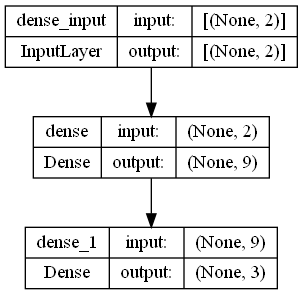

In [20]:
plot_model(irisModel, show_shapes=True)

In [21]:
## 모델 생성
irisModel.compile(loss='categorical_crossentropy',
                 optimizer='adam',
                 metrics='accuracy')

## [4] 모델 학습

In [46]:
# from tensorflow.keras.callbacks import ModelCheckpoint

# MODEL_PATH='model.{epoch:02d}-{val_loss:.2f}.h5'
# modelCB=ModelCheckpoint(filepath=MODEL_PATH)

# model.fit(x_train, y_train, epochs=30, callbacks=[modelCB],
#           validation_data=(x_val, y_val)) # verbose=False

In [23]:
irisModel.fit(x_train, y_train, epochs=1000)

Epoch 1/1000
3/3 [==============================] - 0s 1ms/step - loss: 1.1837 - accuracy: 0.3095
Epoch 2/1000
3/3 [==============================] - 0s 2ms/step - loss: 1.1690 - accuracy: 0.3095
Epoch 3/1000
3/3 [==============================] - 0s 2ms/step - loss: 1.1553 - accuracy: 0.3095
Epoch 4/1000
3/3 [==============================] - 0s 2ms/step - loss: 1.1413 - accuracy: 0.3095
Epoch 5/1000
3/3 [==============================] - 0s 2ms/step - loss: 1.1276 - accuracy: 0.3095
Epoch 6/1000
3/3 [==============================] - 0s 2ms/step - loss: 1.1138 - accuracy: 0.3095
Epoch 7/1000
3/3 [==============================] - 0s 2ms/step - loss: 1.1008 - accuracy: 0.3095
Epoch 8/1000
3/3 [==============================] - 0s 2ms/step - loss: 1.0881 - accuracy: 0.3095
Epoch 9/1000
3/3 [==============================] - 0s 2ms/step - loss: 1.0751 - accuracy: 0.3214
Epoch 10/1000
3/3 [==============================] - 0s 2ms/step - loss: 1.0626 - accuracy: 0.3333
Epoch 11/1000
3/3 [

3/3 [==============================] - 0s 1ms/step - loss: 0.5490 - accuracy: 0.8333
Epoch 84/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.5449 - accuracy: 0.8333
Epoch 85/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.5408 - accuracy: 0.8333
Epoch 86/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.5367 - accuracy: 0.8333
Epoch 87/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.5327 - accuracy: 0.8333
Epoch 88/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.5287 - accuracy: 0.8333
Epoch 89/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.5247 - accuracy: 0.8452
Epoch 90/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.5208 - accuracy: 0.8452
Epoch 91/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.5169 - accuracy: 0.8452
Epoch 92/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.5131 - accuracy: 0.8571
Epoch 93/1000
3/3 [=====

3/3 [==============================] - 0s 2ms/step - loss: 0.3039 - accuracy: 0.9643
Epoch 166/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.3018 - accuracy: 0.9643
Epoch 167/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.2997 - accuracy: 0.9643
Epoch 168/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.2975 - accuracy: 0.9643
Epoch 169/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.2953 - accuracy: 0.9762
Epoch 170/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.2933 - accuracy: 0.9762
Epoch 171/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.2912 - accuracy: 0.9762
Epoch 172/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.2892 - accuracy: 0.9762
Epoch 173/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.2871 - accuracy: 0.9762
Epoch 174/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.2851 - accuracy: 0.9762
Epoch 175/1000


3/3 [==============================] - 0s 2ms/step - loss: 0.1749 - accuracy: 0.9762
Epoch 248/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.1739 - accuracy: 0.9762
Epoch 249/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.1729 - accuracy: 0.9762
Epoch 250/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.1719 - accuracy: 0.9762
Epoch 251/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.1710 - accuracy: 0.9762
Epoch 252/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.1700 - accuracy: 0.9762
Epoch 253/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.1691 - accuracy: 0.9762
Epoch 254/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.1681 - accuracy: 0.9762
Epoch 255/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.1672 - accuracy: 0.9762
Epoch 256/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.1663 - accuracy: 0.9762
Epoch 257/1000


3/3 [==============================] - 0s 1ms/step - loss: 0.1188 - accuracy: 0.9643
Epoch 330/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.1184 - accuracy: 0.9643
Epoch 331/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.1179 - accuracy: 0.9643
Epoch 332/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.1175 - accuracy: 0.9643
Epoch 333/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.1171 - accuracy: 0.9643
Epoch 334/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.1166 - accuracy: 0.9643
Epoch 335/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.1162 - accuracy: 0.9643
Epoch 336/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.1157 - accuracy: 0.9643
Epoch 337/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.1153 - accuracy: 0.9643
Epoch 338/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.1149 - accuracy: 0.9643
Epoch 339/1000


3/3 [==============================] - 0s 2ms/step - loss: 0.0924 - accuracy: 0.9762
Epoch 412/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0922 - accuracy: 0.9762
Epoch 413/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.0919 - accuracy: 0.9762
Epoch 414/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0917 - accuracy: 0.9762
Epoch 415/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0915 - accuracy: 0.9762
Epoch 416/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0914 - accuracy: 0.9762
Epoch 417/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0910 - accuracy: 0.9762
Epoch 418/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0909 - accuracy: 0.9762
Epoch 419/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0907 - accuracy: 0.9762
Epoch 420/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0904 - accuracy: 0.9762
Epoch 421/1000


3/3 [==============================] - 0s 1ms/step - loss: 0.0783 - accuracy: 0.9762
Epoch 494/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0781 - accuracy: 0.9762
Epoch 495/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0780 - accuracy: 0.9762
Epoch 496/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0779 - accuracy: 0.9762
Epoch 497/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0778 - accuracy: 0.9762
Epoch 498/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0776 - accuracy: 0.9762
Epoch 499/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0775 - accuracy: 0.9762
Epoch 500/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0774 - accuracy: 0.9762
Epoch 501/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0773 - accuracy: 0.9762
Epoch 502/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0771 - accuracy: 0.9762
Epoch 503/1000


3/3 [==============================] - 0s 2ms/step - loss: 0.0700 - accuracy: 0.9881
Epoch 576/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0700 - accuracy: 0.9881
Epoch 577/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0700 - accuracy: 0.9881
Epoch 578/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0699 - accuracy: 0.9881
Epoch 579/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0697 - accuracy: 0.9881
Epoch 580/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0696 - accuracy: 0.9881
Epoch 581/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0695 - accuracy: 0.9881
Epoch 582/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0695 - accuracy: 0.9881
Epoch 583/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0694 - accuracy: 0.9881
Epoch 584/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0693 - accuracy: 0.9881
Epoch 585/1000


3/3 [==============================] - 0s 1ms/step - loss: 0.0650 - accuracy: 0.9762
Epoch 658/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0649 - accuracy: 0.9762
Epoch 659/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0648 - accuracy: 0.9762
Epoch 660/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0647 - accuracy: 0.9762
Epoch 661/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0646 - accuracy: 0.9762
Epoch 662/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0647 - accuracy: 0.9762
Epoch 663/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0646 - accuracy: 0.9762
Epoch 664/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0645 - accuracy: 0.9762
Epoch 665/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0644 - accuracy: 0.9762
Epoch 666/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0644 - accuracy: 0.9762
Epoch 667/1000


3/3 [==============================] - 0s 1ms/step - loss: 0.0615 - accuracy: 0.9762
Epoch 740/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0615 - accuracy: 0.9762
Epoch 741/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0615 - accuracy: 0.9762
Epoch 742/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0614 - accuracy: 0.9762
Epoch 743/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0614 - accuracy: 0.9762
Epoch 744/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0613 - accuracy: 0.9762
Epoch 745/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0613 - accuracy: 0.9762
Epoch 746/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0613 - accuracy: 0.9762
Epoch 747/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0613 - accuracy: 0.9762
Epoch 748/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0612 - accuracy: 0.9762
Epoch 749/1000


3/3 [==============================] - 0s 1ms/step - loss: 0.0593 - accuracy: 0.9762
Epoch 822/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0592 - accuracy: 0.9762
Epoch 823/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0592 - accuracy: 0.9762
Epoch 824/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0593 - accuracy: 0.9762
Epoch 825/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0592 - accuracy: 0.9762
Epoch 826/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0592 - accuracy: 0.9762
Epoch 827/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0592 - accuracy: 0.9762
Epoch 828/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0592 - accuracy: 0.9762
Epoch 829/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0591 - accuracy: 0.9762
Epoch 830/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0591 - accuracy: 0.9762
Epoch 831/1000


3/3 [==============================] - 0s 2ms/step - loss: 0.0576 - accuracy: 0.9762
Epoch 904/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0576 - accuracy: 0.9762
Epoch 905/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0576 - accuracy: 0.9762
Epoch 906/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0576 - accuracy: 0.9762
Epoch 907/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0576 - accuracy: 0.9762
Epoch 908/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0576 - accuracy: 0.9762
Epoch 909/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0575 - accuracy: 0.9762
Epoch 910/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0576 - accuracy: 0.9762
Epoch 911/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0575 - accuracy: 0.9762
Epoch 912/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0575 - accuracy: 0.9762
Epoch 913/1000


3/3 [==============================] - 0s 2ms/step - loss: 0.0566 - accuracy: 0.9762
Epoch 986/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0565 - accuracy: 0.9762
Epoch 987/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0565 - accuracy: 0.9762
Epoch 988/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0565 - accuracy: 0.9762
Epoch 989/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0565 - accuracy: 0.9762
Epoch 990/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0564 - accuracy: 0.9762
Epoch 991/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0565 - accuracy: 0.9762
Epoch 992/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0564 - accuracy: 0.9762
Epoch 993/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0565 - accuracy: 0.9762
Epoch 994/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0564 - accuracy: 0.9762
Epoch 995/1000


## [5] 평가

In [24]:
irisModel.evaluate(x_test, y_test)

2/2 [==============================] - 0s 3ms/step - loss: 0.1103 - accuracy: 0.9474


[0.11034660786390305, 0.9473684430122375]

In [25]:
lossv, accv=irisModel.evaluate(x_test, y_test)

2/2 [==============================] - 0s 2ms/step - loss: 0.1103 - accuracy: 0.9474


In [26]:
lossv, accv

(0.11034660786390305, 0.9473684430122375)

## [6] 모델 저장

In [27]:
from tensorflow.keras.models import save_model

In [28]:
M_FILE='irisModel.h5'
W_FILE='irisWeight.h5'

In [29]:
if accv>0.88:
    save_model(irisModel, M_FILE)
    irisModel.save_weights(W_FILE)

## [6] 복원
---
- 모델 또는 가중치 복원
- load_model(모델 파일 또는 모델 폴더명)
- Sequential.load_weights(가중치 파일 또는 폴더명)

### [6-1] 모델 복원

In [30]:
from tensorflow.keras.models import load_model

In [31]:
reModel=load_model(M_FILE)

In [32]:
reModel.evaluate(x_test, y_test)

2/2 [==============================] - 0s 3ms/step - loss: 0.1103 - accuracy: 0.9474


[0.11034660786390305, 0.9473684430122375]

In [33]:
reModel.summary()

Model: "irisModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 9)                 27        
                                                                 
 dense_1 (Dense)             (None, 3)                 30        
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


### [6-2] 가중치 복원
---

In [40]:
# 모델 구조 구성
newModel=Sequential(name='newirisModel')
newModel.add(Dense(9, activation='relu', input_shape=(2,)))
newModel.add(Dense(3, activation='softmax'))
newModel.summary()

Model: "newirisModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 9)                 27        
                                                                 
 dense_3 (Dense)             (None, 3)                 30        
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


In [41]:
# 모델 생성
newModel.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics='accuracy')

In [42]:
# 가중치 로딩
newModel.load_weights(W_FILE)

In [43]:
newModel.evaluate(x_test, y_test)

2/2 [==============================] - 0s 2ms/step - loss: 0.1103 - accuracy: 0.9474


[0.11034660786390305, 0.9473684430122375]

## [7] 예측

In [44]:
irisModel.predict(x_test[:5])

1/1 [==============================] - 0s 66ms/step


array([[9.9908984e-01, 8.5171708e-04, 5.8444806e-05],
       [9.9822479e-01, 1.6832661e-03, 9.2031485e-05],
       [9.9877685e-01, 1.1505096e-03, 7.2598275e-05],
       [2.4360266e-04, 9.9754721e-01, 2.2091160e-03],
       [9.9742126e-01, 2.4621012e-03, 1.1663726e-04]], dtype=float32)

In [45]:
y_test[:5]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])